In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("synb.csv")
print(data.head())
print(data.columns)
Before_imputation = pd.DataFrame(data)
print("Data Before performing imputation\n",Before_imputation.head())

       x      y  class
0  0.228  0.559      1
1  0.216  0.528      1
2  0.221  0.552      1
3  0.215  0.538      1
4  0.224  0.548      1
Index(['x', 'y', 'class'], dtype='object')
Data Before performing imputation
        x      y  class
0  0.228  0.559      1
1  0.216  0.528      1
2  0.221  0.552      1
3  0.215  0.538      1
4  0.224  0.548      1


In [ ]:
from sklearn.impute import SimpleImputer
df=pd.DataFrame(data)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on to the dataset
mean_imputer = mean_imputer.fit(df)


# Apply the imputation
results = mean_imputer.transform(df.values)
results

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


array([[0.228, 0.559, 1.   ],
       [0.216, 0.528, 1.   ],
       [0.221, 0.552, 1.   ],
       ...,
       [0.513, 0.233, 2.   ],
       [0.506, 0.221, 2.   ],
       [0.515, 0.26 , 2.   ]])

In [ ]:
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
ai=pd.DataFrame(After_imputation)
cdata = ai.to_csv("TrainingDataset.csv")
data1=pd.read_csv("TrainingDataset.csv",usecols=(1,2))
data1["class"]=Before_imputation["class"]
data1.head()
print(data1.shape)
data1.isnull().any().any()
x=data1.loc[:,['0','1']].values
print(x.shape)
data1


(4811, 3)
(4811, 2)


,0,1,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1
...,...,...,...
4806,0.507,0.269,2
4807,0.526,0.237,2
4808,0.513,0.233,2
4809,0.506,0.221,2


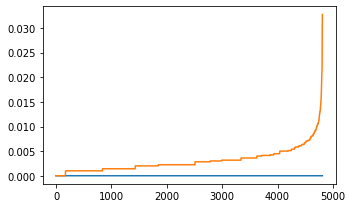

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x)
distances,indices=nbrs.kneighbors(x)
distances = np.sort(distances, axis = 0)
distances = distances[:,]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

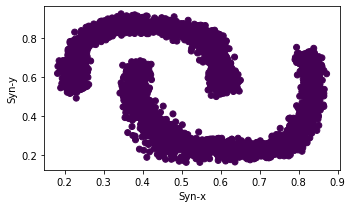

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x)
labels = dbscan.labels_
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "viridis")
plt.xlabel("Syn-x")
plt.ylabel("Syn-y")
plt.show()

In [ ]:
Before_imputation = pd.DataFrame(data)
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
ai=pd.DataFrame(After_imputation)
cdata = ai.to_csv("new.csv")  
data1=pd.read_csv("new.csv",usecols=(1,2))
data1["class"]=Before_imputation["class"]
data1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
data1.head()
X=data1.drop("class",axis=1)
Y=data1["class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
res=dt.score(X_test,y_test)
Xa=data1.drop("class",axis=1)
Ya=data1["class"]
X_1train, X_1test, y_1train, y_1test = train_test_split(Xa, Ya, test_size=0.30, random_state=1, stratify=Ya)
res

1.0

In [ ]:
## KD TREE

class TreeNode(object):
    def __init__(self, v1,v2):
        self.x = v1
        self.y=v2
        self.left = None
        self.right = None

def create_tree(arr):
    if not arr:
        return None
    mid_num = len(arr)//2
    node = TreeNode(arr[mid_num][0],arr[mid_num][1])
    node.left = create_tree(arr[:mid_num])
    node.right = create_tree(arr[mid_num+1:])
    return node
def RangeSearch(elem,tree,temp,arr,num=0):
  if not tree or num>=len(elem):
    return None
  if not elem:
    return None
  # print(elem[num][0],tree.x,tree.y)
  if elem[num][0]==tree.x:
    # print("ahsh")
    if tree.left is None or tree.right is None:
      arr.append(tree)
    else:
      arr.append(tree.left)
      arr.append(tree.right)
    num+=1
    RangeSearch(elem,temp,temp,arr,num)
  else:
      RangeSearch(elem,tree.right,temp,arr,num)
      RangeSearch(elem,tree.left,temp,arr,num)

def Predict(elem,tree,arr):
  if not tree:
    return None
  if not elem:
    return None
  # print(elem[num][0],tree.x,tree.y)
  if elem[0]==tree.x:
    if tree.left is None or tree.right is None:
      arr.append(tree)
    else:
      arr.append(tree.left)
      arr.append(tree.right)
  else:
      Predict(elem,tree.right,arr)
      Predict(elem,tree.left,arr)

def insert(tree, x,y):
  if tree.x:
    if x < tree.x:
      if tree.left is None:
          tree.left = TreeNode(x,y)
      else:
          insert(tree.left,x,y)
    elif x > tree.x:
      if tree.right is None:
        tree.right = TreeNode(x,y)
      else:
        insert(tree.right,x,y)

def getlist(tree,f_list):
  if tree.left:
      getlist(tree.left,f_list)
  if tree.right:
      getlist(tree.right,f_list)
  f_list.append([tree.x,tree.y])



In [ ]:
####################
"""
 CI-Clustering
Input: Xcomplete and Xincomplete
Output: Vector y denoting the clustering result
1: Normalize.Xcomplete/
2: Normalize.Xincomplete/
3: tree KD-TREE.Xcomplete/
4: neighborhoods RangeSearch.Xcomplete; tree/
5: clusters getClusters.Xcomplete; neighborhoods/
6: for x in Xincomplete do
7: x predict.x; tree; clusters/
8: insert.tree; x/
9: update neighborhoods.neighborhoods/
10: update clusters.clusters/
11: en
"""
from sklearn.metrics import f1_score
# from anytree import Node, RenderTree
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN
complete=X_1train.values.tolist()
uncomplete=X_train.values.tolist()
complete_norm = preprocessing.normalize(X_1train)
uncomplete_norm=preprocessing.normalize(X_train)
# print(complete_norm.tolist())
# print(X_1train)
tree=create_tree(complete_norm.tolist())
# print(tree)
arr=[]
num=0
RangeSearch(complete_norm.tolist()[:20],tree,tree,arr,num)
weights=[]
for i in arr:
  weights.append(i.x)
  weights.append(i.y)
# print(arr)
dbscan = DBSCAN(eps = 8, min_samples = 4)
train=dbscan.fit(complete_norm)
clusters=train.labels_
# print(0 in clusters.tolist())
for x in uncomplete_norm:
  neigh=[]
  x=x.reshape(1,-1)
  # print(x)
  Predict(x.tolist()[0],tree,neigh)
  # print(neigh)
  miss_y=0
  miss_x=0
  for i in neigh:
    # print(i)
    miss_y+=i.y
    miss_x+=i.x
  insert(tree,miss_x,miss_y)
f_list=[]
getlist(tree,f_list)
  # print(f_list)
res=dt.predict(f_list)
print(res)
# check=X_1test.values.tolist().extend(X_test.values.tolist())
frames = [y_train, y_1train]
result = pd.concat(frames)
print(result.shape)
print(res.shape)
si=result.shape[0]-res.shape[0]
output=f1_score(res,result[si:],average='weighted')
output




# labels = dbscan.labels_ 
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# ans=tree.query_radius(X_train[:1], r=0.3)
# appender=np.array(normalized)
# dbscan = DBSCAN(eps = 8, min_samples = 4)
# # ans
# for x in nomr2:
#   x=x.reshape(1,-1)
#   val=dbscan.fit_predict(x)
#   np.insert(appender,obj=len(appender),values=val)
#   # tree=array_to_bst(appender)
#   labels = dbscan.labels_ 
#   # n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# appender

[1 1 1 ... 1 2 2]
(6734,)
(6669,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5032554188832492

In [ ]:
#LI Clustering
from sklearn.metrics import f1_score
# from anytree import Node, RenderTree
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN
complete=X_1train.values.tolist()
uncomplete=X_train.values.tolist()
complete_norm = preprocessing.normalize(X_1train)
uncomplete_norm=preprocessing.normalize(X_train)
# print(complete_norm.tolist())
# print(X_1train)
tree=create_tree(complete_norm.tolist())
dbscan = DBSCAN(eps = 8, min_samples = 4)
train=dbscan.fit(complete_norm)
clusters=train.labels_
# print(0 in clusters.tolist())
for x in uncomplete_norm:
  neigh=[]
  x=x.reshape(1,-1)
  # print(x)
  Predict(x.tolist()[0],tree,neigh)
  # print(neigh)
  miss_y=0
  miss_x=0
  for i in neigh:
    # print(i)
    miss_y+=i.y
    miss_x+=i.x
  insert(tree,miss_x,miss_y)
f_list=[]
getlist(tree,f_list)
train=dbscan.fit(f_list)
clusters=train.labels_
res=dt.predict(f_list)
print(res)

[1 1 1 ... 1 2 2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
f_list

[[0.27078309672430856, 0.962640386919432],
 [0.2683244075628877, 0.9633286107585642],
 [0.27335843910850066, 0.9619122432780259],
 [0.2714601650218062, 0.9624496759864037],
 [0.2755596101787932, 0.9612839857389238],
 [0.27506063191739133, 0.961426881655181],
 [0.27999999999999997, 0.96],
 [0.2791280434473638, 0.960253891094041],
 [0.2809958715857758, 0.9597089768006498],
 [0.2778914668170219, 0.9606124778860017],
 [0.2823263743670628, 0.9593184134252554],
 [0.28229584288523907, 0.959327398279499],
 [0.28202020961790236, 0.9594084642982228],
 [0.28129180444881063, 0.9596222802488134],
 [0.28309107310433124, 0.959093032155191],
 [0.2844470071718319, 0.9586917649124705],
 [0.2843842936854435, 0.9587103699788749],
 [0.2839187315269263, 0.9588483477005846],
 [0.2848216774098792, 0.9585805193500557],
 [0.28490737963640583, 0.9585550505989299],
 [0.2828468469575132, 0.9591650854603669],
 [0.27424240625163093, 0.9616605963713577],
 [0.2633256370467511, 0.9647070067507143],
 [0.2858699884915783

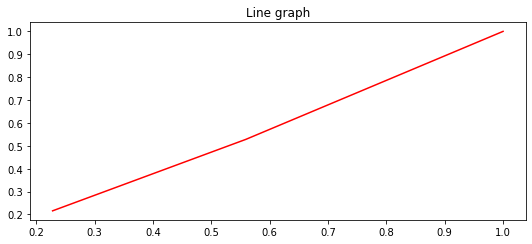

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = results[0]
y = results[1]

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()


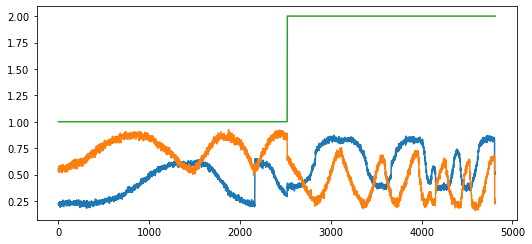

In [ ]:
plt.plot(results)
plt.show()

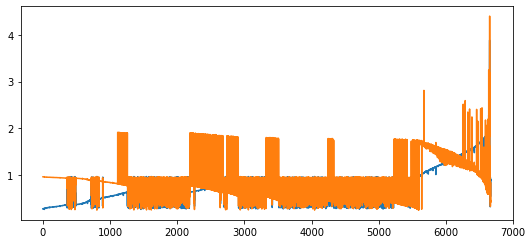

In [ ]:
plt.plot(f_list)
plt.show()

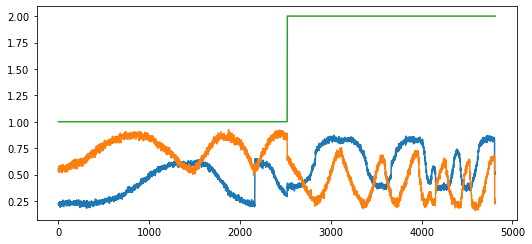

In [ ]:
plt.plot(data)
plt.show()

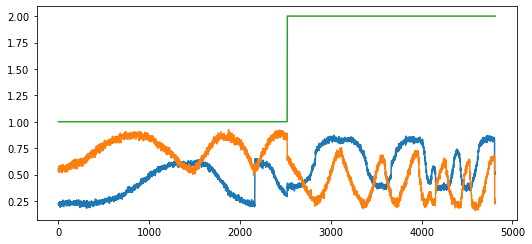

In [ ]:
plt.plot(data1)
plt.show()

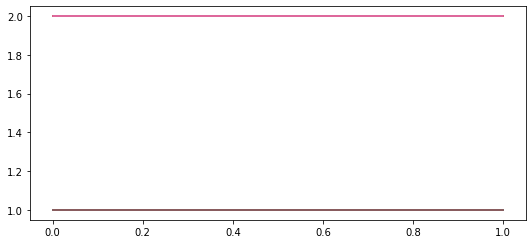

In [ ]:
plt.plot(frames)
plt.show()

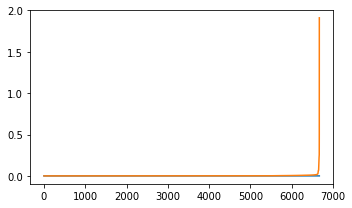

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(f_list)
distances,indices=nbrs.kneighbors(f_list)
distances = np.sort(distances, axis = 0)
distances = distances[:,]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

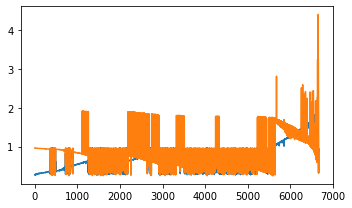

In [ ]:
df = pd.DataFrame(f_list, columns = ['x','y'])
plt.plot(df)
plt.show()